<a href="https://colab.research.google.com/github/JeremiahKamama/Spacy-Analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string
import xgboost as xgb
import re



from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer


from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline



from wordcloud import WordCloud



In [93]:
nlp = spacy.load("en_core_web_sm")

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
imdb = pd.read_csv('/content/drive/MyDrive/data/IMDB.csv')

imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


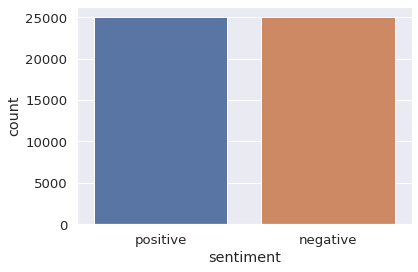

In [96]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(imdb.sentiment)

In [97]:
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [98]:
imdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [99]:
imdb.sentiment.replace("positive", 1 , inplace= True)
imdb.sentiment.replace("negative", 0, inplace= True)
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [100]:
miss_val = imdb.isnull().sum()

miss_val[0:10]

review       0
sentiment    0
dtype: int64

In [101]:
stopwords = list(STOP_WORDS)
print(stopwords)

['mine', 'twelve', 'those', 'whereafter', 'her', 'n‘t', 'what', 'except', 'had', 'something', 'than', 'just', 'hence', 'own', 'by', '‘m', 'beforehand', 'elsewhere', '’ll', 'fifty', 'using', 'somewhere', '‘d', 'down', 'whereupon', 'before', 'whatever', 'also', 'whether', 'three', 'four', 'hereby', 'none', 'still', 'during', 'at', 'within', 'done', 'be', 'becoming', 'ourselves', 'put', 'other', '‘ve', 'never', 'once', 'thru', 'various', 'must', 'neither', 'otherwise', 'if', 'because', 'noone', 'after', 'formerly', 'should', 'take', 'become', 'however', 'yourselves', 'from', 'full', 'although', 'part', 'us', 'were', 'your', 'them', 'above', 'itself', 'yet', 'ca', 'whence', 'am', 'afterwards', 'whereas', 'i', 'among', 'somehow', 'all', 'thereupon', 'though', 'will', 'did', 'much', 'enough', 'else', 'many', 'hers', 'ten', 'while', 'beyond', 'make', 'forty', "'ll", 'few', 'moreover', 'per', 'serious', 'please', 'twenty', 'becomes', 'his', 'hereafter', 'across', 'front', 'for', 'unless', 'whe

In [102]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [103]:
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))
imdb['review'] = imdb['review'].apply(lambda x: x.lower())
imdb['review'] = imdb['review'].apply(lambda x: x.strip())


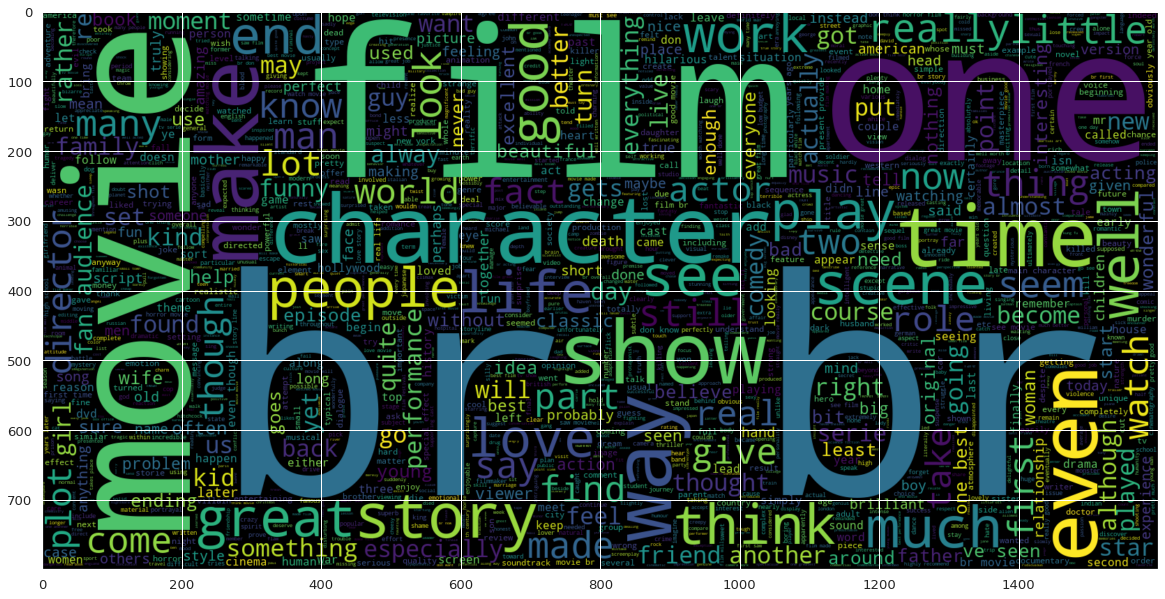

In [104]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 1].review))
plt.imshow(cloud, interpolation='bilinear')

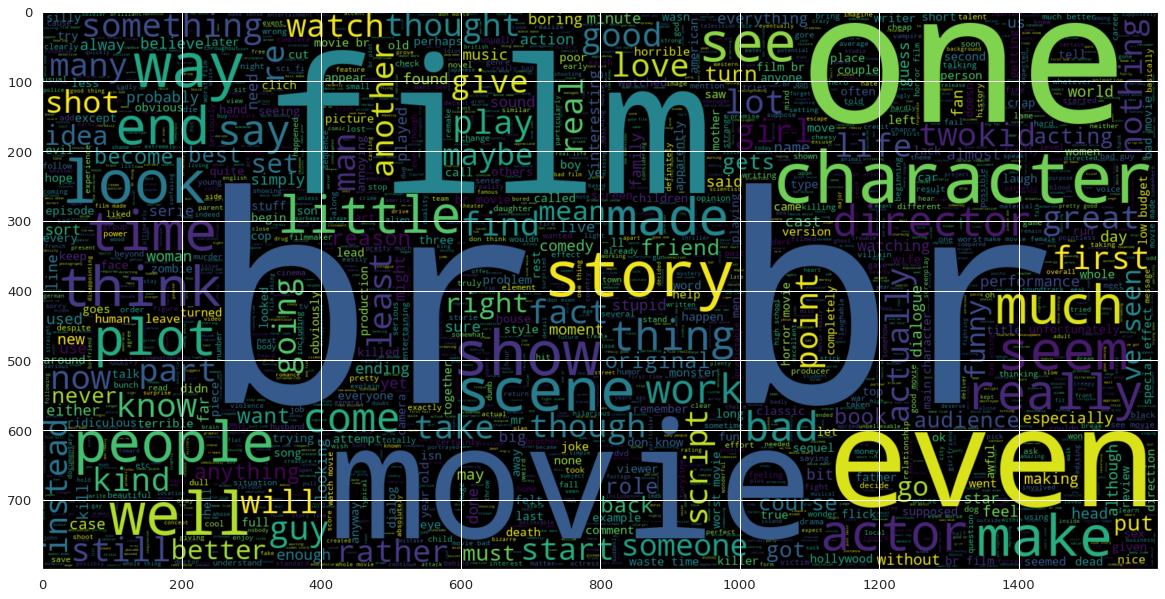

In [105]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 0].review))
plt.imshow(cloud, interpolation='bilinear')

In [106]:
X = imdb['review']
y = imdb['sentiment']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [107]:

#learning_rate=0.1, max_depth=7,n_estimators=80,use_label_encoder=False,eval_metric='auc'
#tfidf = TfidfVectorizer(tokenizer = clean_data)


#steps = [('tfidf',tfidf), ('classifier', xgb.XGBClassifier(random_state=1,learning_rate=0.1))]

#pipe = Pipeline(steps)


 

In [108]:
 def spacy_tokenizer(sentence):
  doc = nlp(sentence)
  tokens =[]

  for token in doc:
    if token.lemma_ != '-PRON-':
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  clean_tokens = []
  for token in tokens:
    if token not in punct:
      clean_tokens.append(token)
  return clean_tokens

In [109]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('model', MultinomialNB())])



In [110]:

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"F1 Score : {f1} and Accuracy Score {accuracy}")


F1 Score : 0.8607905219078746 and Accuracy Score 0.8637


In [111]:
text_cf = Pipeline([('tfidf', TfidfVectorizer()),('classifier',LinearSVC(),)])

In [112]:
text_cf.fit(X_train,y_train)

predictions = text_cf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

f1 = f1_score(y_test,y_pred)

print(f"F1 Score : {f1} and Accuracy Score {accuracy}")

F1 Score : 0.8607905219078746 and Accuracy Score 0.8637


In [ ]:
!pip install transformers

In [114]:
import transformers



In [115]:
from transformers import pipeline

classifier_sentiment = pipeline("sentiment-analysis")

In [116]:
classifier_sentiment(imdb['review'].values[300])

[{'label': 'NEGATIVE', 'score': 0.9952220320701599}]